<a href="https://colab.research.google.com/github/tjwjddnr/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding='utf-8', sep=',', header=0,
                 index_col=None, skiprows=None, nrows=None)

print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)
print(data)

## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient='records', encoding='utf-8')
print(df)

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}
                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
from ast import pattern
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('collcenter20250301_masked.log', mode='w') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params=params)
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.019073486328125, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-09-25T12:00', 'interval': 900, 'temperature_2m': 19.8}}
서울시 종로구의 현재 온도는 : 19.8°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  114M  100  114M    0     0  21.7M      0  0:00:05  0:00:05 --:--:-- 26.0M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.9 MB/131 MB of archives.
After this operation, 447 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 mesa-vulkan-drivers amd64 23.2.1-1ubuntu3.1~22.04.3 [10.7

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
driver.get(url)

## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)

## 드라이버 종료
driver.quit()

['\n\t\tAlert \n\t\t\n\t']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = 'ufEA375H6EQcMFlUIAjdNjZWwQYKsy+5pHi/OqJcPmtIZ4Q4rGnomKar8DpCkYQposvGwkTYL8emlxbf6Ns9+Q=='

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '전국',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params=params)


## 수집된 데이터 출력
print(response.json())

## 호출 성공/실패 출력



{'response': {'body': {'totalCount': 666, 'items': [{'so2Grade': '1', 'coFlag': None, 'khaiValue': '67', 'so2Value': '0.003', 'coValue': '0.5', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '20', 'khaiGrade': '2', 'pm25Value': '14', 'sidoName': '경기', 'no2Flag': None, 'no2Grade': '2', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-25 21:00', 'coGrade': '1', 'no2Value': '0.040', 'stationName': '중앙대로(고잔동)', 'pm10Grade': '1', 'o3Value': '0.004'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '53', 'so2Value': '0.002', 'coValue': '0.6', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '32', 'khaiGrade': '2', 'pm25Value': '18', 'sidoName': '경기', 'no2Flag': None, 'no2Grade': '2', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-25 21:00', 'coGrade': '1', 'no2Value': '0.031', 'stationName': '별양동', 'pm10Grade': '1', 'o3Value': '0.011'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '43', 'so2Value': '0.002', 'c

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/1613000/ApHusEnergyUseInfoOfferServiceV2/getWntyAvrgEnergyUseAmountInfoSearchV2'
api_key = 'ufEA375H6EQcMFlUIAjdNjZWwQYKsy+5pHi/OqJcPmtIZ4Q4rGnomKar8DpCkYQposvGwkTYL8emlxbf6Ns9+Q=='


def get_year_months():
    year_months = []
    for year in range(2015, 2024+1):
        for month in range(1, 12+1):
            year_months.append(f"{year}{month:02d}")
    return year_months
# 이 함수가 실행되면 201501 부터 202412 까지의 문자열이 반환 [201501, ..., 202412]
responses = []

for year_months in get_year_months():
    # 함수로 반환된 연도월이 year_months에 하나씩 할당됨
    params = {
        'serviceKey': api_key,
        'searchDate': year_months
    }
    # 각 할당된 연도월로 요청
    response = requests.get(url, params=params)
    # 해당 연도월의 결과값을 responses에 append함
    responses.append(response.json())

## 수집된 데이터 출력
if response.status_code == 200:
    print("데이터 수집 성공")
    print('총' + str(len(responses))+'개의 데이터 수집됨')
    print(response.json())
else:
    print("데이터 수집 실패")


데이터 수집 성공
총120개의 데이터 수집됨
{'response': {'body': {'item': {'heat': 514, 'waterHot': 155, 'gas': 3, 'elect': 711, 'waterCool': 241}}, 'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}}}


In [ ]:
import requests
import pandas as pd
url = 'http://openapi.seoul.go.kr:8088/6c4156444c736a7537326862594544/json/energyUseDataSummaryInfo/1/5/2025/02'
response = requests.get(url)
data = response.json()['energyUseDataSummaryInfo']['row']
df = pd.DataFrame(data)
df.to_csv('Test123.csv', encoding='utf-8', index=False)


In [3]:
import requests

## 데이터 수집 url 및 api key 설정
base_url = 'http://openapi.seoul.go.kr:8088/6e6f437975736a7531344544427161/json/energyUseDataSummaryInfo/1/5'

responses = []

def get_year_months():
    year_months = []
    for year in range(2015, 2024+1):
        for month in range(1, 12+1):
            year_months.append(f"{year}/{month:02d}")
    return year_months

for year_months in get_year_months():
    url = f"{base_url}/{year_months}"
    # 각 할당된 연도월로 요청
    response = requests.get(url)
    responses.append(response.json())

## 수집된 데이터 출력
if response.status_code == 200:
    print('데이터 수집 성공')
    print(responses)
else:
    print('데이터 수집 실패')


데이터 수집 성공
[{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433

In [47]:
import pandas as pd
all_rows = []
for item in responses:
    rows = item['energyUseDataSummaryInfo']['row']
    all_rows.extend(rows)

df = pd.DataFrame(all_rows)
df.to_csv('energy_data.csv', index=False, encoding='utf-8')
df

,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS1,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE
0,2015,01,개인,767791,193784708,194781915,204969429,-6090964,-2582568.736,59133720,...,12723680.426,12899476.73,8179.308,2715.530256,22740838.937,23400055.303,27090493.875,-2504435.652,-33660084.213069,2015-06-04 17:03:55.0
1,2015,01,학교,1382,134955565,128707423,145561511,-2178902,-923854.448,9107197,...,2097433.8,2133200.8,-39498.1,-13113.3692,0,0,0,0,0,2015-06-04 17:03:55.0
2,2015,01,종교단체,32,372270,363376,411363,-15099.5,-6402.188,53331,...,4548,4519,1411.5,468.618,0,0,0,0,0,2015-06-04 17:03:55.0
3,2015,01,소상공인,2058,10249618,9927610,11039593,-233983.5,-99209.004,536119,...,146480.6,147325.6,369.9,122.8068,0,0,0,0,0,2015-06-04 17:03:55.0
4,2015,01,공동주택관리소,1747,327102096,329852334,351694752,-13671447,-5796693.528,22834274,...,12763070,12979835.8,-26645.4,-8846.2728,0,0,0,0,0,2015-06-04 17:03:55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2024,12,공동주택관리소,3716,548480228,557799290,559693904,-10266369,-10266369,8221238,...,20228097.5,20488646.8,-96224.45,-288673.35,0,0,0,0,0,2025-03-01 04:02:55.0
596,2024,12,기업,19451,633735769,641412053,669494932,-21717723.5,-21717723.5,30096486,...,4406465.4,4396396.4,47346.5,142039.5,0,0,0,0,0,2025-03-01 04:02:55.0
597,2024,12,개인,1250620,134828126,138280636,138879530,-3751957,-3504709,42103424,...,7440605,7625718.9,-206308.35,-573725.128,1513199.277,1598857.184,1781397.386,-176928.008,-376996.699240516,2025-03-01 04:02:55.0
598,2024,12,공공기관,2459,152992881,161100765,162060905,-8587954,-8587954,3814815,...,854671.2,833317.4,52847.7,158543.1,0,0,0,0,0,2025-03-01 04:02:55.0


In [51]:
df_persnal = df[df["MM_TYPE"] == "개인"]
df_filterd = df_persnal[['MM_TYPE', 'YEAR', 'MON', 'EUS', 'GUS', 'WUS','HUS']]
df_filterd.to_csv("filterd_data", index=False, encoding='utf-8')

def get_season(row):
    mon = int(row['MON'])
    if 3 <= mon <= 5:
        return '봄'
    elif 6 <= mon <= 8:
        return '여름'
    elif 9 <= mon <= 11:
        return '가을'
    else:
        return '겨울'

df_filterd['SEASON'] = df_filterd.apply(get_season, axis=1)
df_filterd = df_filterd[['MM_TYPE', 'YEAR', 'MON', 'SEASON', 'EUS', 'GUS', 'WUS', 'HUS']]
df_filterd.to_csv('filterd_data', index=False, encoding='utf-8')
df_filterd

/tmp/ipython-input-3060624859.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterd['SEASON'] = df_filterd.apply(get_season, axis=1)


,MM_TYPE,YEAR,MON,SEASON,EUS,GUS,WUS,HUS
0,개인,2015,01,겨울,193784708.00,59133720.00,12819757.89,22740838.94
5,개인,2015,02,겨울,189974230.00,56487358.00,12656888.22,18793320.21
20,개인,2015,05,봄,177289769.00,22060892.00,13086734.21,1320895.80
27,개인,2015,06,여름,186073153.00,12677645.00,14241651.40,294312.63
34,개인,2015,07,여름,165114568.00,8893640.00,12083879.04,702863.65
...,...,...,...,...,...,...,...,...
579,개인,2024,08,여름,463971328.00,7072251.00,15873544.60,130082.26
581,개인,2024,09,가을,409872908.00,5729131.00,15143321.60,3420507.14
585,개인,2024,10,가을,282268119.00,8233421.00,15297669.90,2695491.40
594,개인,2024,11,가을,257927956.00,17418221.00,14678672.50,8836296.45


In [50]:
df_filterd
df_filterd['TOTAL_M'] = df_filterd['TOTAL'] / 1_000_000
pd.set_option('display.float_format', '{:.2f}'.format)
df_filterd

,MM_TYPE,YEAR,MON,SEASON,EUS,GUS,WUS,HUS,TOTAL,TOTAL_M
0,개인,2015,01,겨울,193784708,59133720,12819757.886,22740838.937,288479024.82,288.48
5,개인,2015,02,겨울,189974230,56487358,12656888.218,18793320.213,277911796.43,277.91
20,개인,2015,05,봄,177289769,22060892,13086734.214,1320895.801,213758291.01,213.76
27,개인,2015,06,여름,186073153,12677645,14241651.402,294312.634,213286762.04,213.29
34,개인,2015,07,여름,165114568,8893640,12083879.038,702863.645,186794950.68,186.79
...,...,...,...,...,...,...,...,...,...,...
579,개인,2024,08,여름,463971328,7072251,15873544.6,130082.263,487047205.86,487.05
581,개인,2024,09,가을,409872908,5729131,15143321.6,3420507.136,434165867.74,434.17
585,개인,2024,10,가을,282268119,8233421,15297669.9,2695491.396,308494701.30,308.49
594,개인,2024,11,가을,257927956,17418221,14678672.5,8836296.454,298861145.95,298.86


In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and direc

In [53]:
df[['EUS', 'GUS', 'WUS', 'HUS']] = df[['EUS', 'GUS', 'WUS', 'HUS']].astype(float)
df_filterd['TOTAL'] = df[['EUS', 'GUS', 'WUS', 'HUS']].sum(axis=1)

yearly_sum = df_filterd.groupby('YEAR')['TOTAL'].sum()

df_filterd.to_csv('filterd_data_total', index=False, encoding='utf-8')

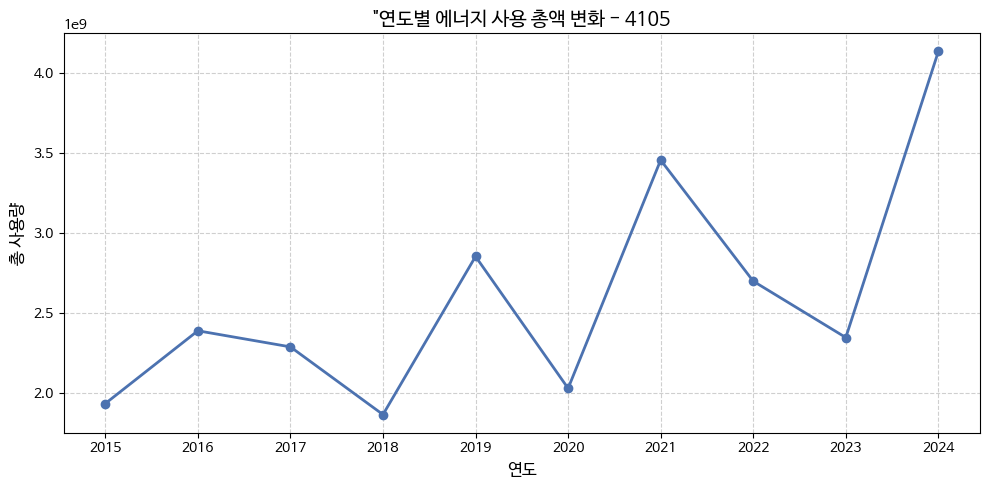

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import os

df[['EUS', 'GUS', 'WUS', 'HUS']] = df[['EUS', 'GUS', 'WUS', 'HUS']].astype(float)
df_filterd['TOTAL'] = df[['EUS', 'GUS', 'WUS', 'HUS']].sum(axis=1)

yearly_sum = df_filterd.groupby('YEAR')['TOTAL'].sum()

plt.rc('font', family = 'NanumBarunGothic')

plt.figure(figsize=(10, 5))
plt.plot(yearly_sum.index, yearly_sum.values, marker='o', color='#4C72B0', linewidth=2)
plt.title('"연도별 에너지 사용 총액 변화 - 4105', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('총 사용량', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [62]:
df = pd.read_csv('filterd_data_total', encoding='utf-8')
df

,MM_TYPE,YEAR,MON,SEASON,EUS,GUS,WUS,HUS,TOTAL
0,개인,2015,1,겨울,193784708.00,59133720.00,12819757.89,22740838.94,288479024.82
1,개인,2015,2,겨울,189974230.00,56487358.00,12656888.22,18793320.21,277911796.43
2,개인,2015,5,봄,177289769.00,22060892.00,13086734.21,1320895.80,213758291.01
3,개인,2015,6,여름,186073153.00,12677645.00,14241651.40,294312.63,213286762.04
4,개인,2015,7,여름,165114568.00,8893640.00,12083879.04,702863.65,186794950.68
...,...,...,...,...,...,...,...,...,...
78,개인,2024,8,여름,463971328.00,7072251.00,15873544.60,130082.26,487047205.86
79,개인,2024,9,가을,409872908.00,5729131.00,15143321.60,3420507.14,434165867.74
80,개인,2024,10,가을,282268119.00,8233421.00,15297669.90,2695491.40,308494701.30
81,개인,2024,11,가을,257927956.00,17418221.00,14678672.50,8836296.45,298861145.95


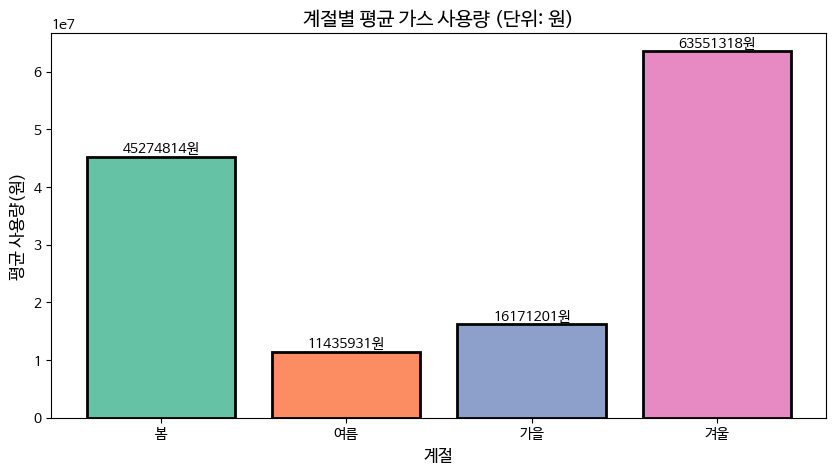

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('filterd_data_total', encoding='utf-8')

df.columns = df.columns.str.strip()
df['GUS'] = pd.to_numeric(df['GUS'], errors='coerce')

saeson_avg = df.groupby('SEASON')['GUS'].mean().reindex(['봄', '여름', '가을', '겨울'])

plt.rc('font', family = 'NanumBarunGothic')

plt.figure(figsize=(10, 5))

bars = plt.bar(
    saeson_avg.index,
    saeson_avg.values,
    color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
    edgecolor='black',
    linewidth=2
)

plt.title('계절별 평균 가스 사용량 (단위: 원)', fontsize=14)
plt.xlabel('계절', fontsize=12)
plt.ylabel('평균 사용량(원)', fontsize=12)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.0f}원',
        fontsize=10,
        ha='center',
        va='bottom'
    )

plt.show()